In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set_theme(style="white", font_scale=1.5)


In [2]:
data_folder = "../data/2022-05-22_pilot"
df = pd.read_csv(os.path.join(data_folder, 'data_pilot2.csv'), index_col=[0])
df['total_ex'] = df['heads'] + df['tails']
df['mean'] = df['heads'] / (df['heads'] + df['tails'])
df['trial'] = df['block_type'] + df['trial_num'].apply(lambda x: str(x))
df.loc[(df['student_class'] == 'A') | (
    df['student_class'] == 'B'), 'student_experience'] = 'less'
df.loc[(df['student_class'] == 'C') | (
    df['student_class'] == 'D'), 'student_experience'] = 'more'
df['theta'] = df['true_theta'] # for plotting purposes
df


,subject_id,student_idx,block_type,trial_num,true_theta,student_a,student_b,student_class,heads,tails,student_guess,error,bonus,total_ex,mean,trial,student_experience,theta
0,A13FUEPWBCLBUY,0,seqNoFeedback,0,0.5,8,2,D,5,1,NaN,NaN,NaN,6,0.833333,seqNoFeedback0,more,0.5
1,A13FUEPWBCLBUY,0,seqNoFeedback,1,0.5,8,2,D,3,3,0.727273,0.227273,0.0,6,0.500000,seqNoFeedback1,more,0.5
2,A13FUEPWBCLBUY,1,nonSeqPartial,0,0.8,1,4,A,5,0,0.600000,0.200000,0.0,5,1.000000,nonSeqPartial0,less,0.8
3,A13FUEPWBCLBUY,2,nonSeqFull,0,0.8,4,1,B,8,0,0.923077,0.123077,0.0,8,1.000000,nonSeqFull0,less,0.8
4,A13FUEPWBCLBUY,3,nonSeqFull,0,0.2,4,1,B,2,8,0.400000,0.200000,0.0,10,0.200000,nonSeqFull0,less,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1036,AX27MR7AMU52H,21,nonSeqPartial,0,0.8,8,2,D,10,4,0.750000,0.050000,0.0,14,0.714286,nonSeqPartial0,more,0.8
1037,AX27MR7AMU52H,22,seqFeedback,0,0.5,4,1,B,9,7,0.619048,NaN,NaN,16,0.562500,seqFeedback0,less,0.5
1038,AX27MR7AMU52H,22,seqFeedback,1,0.5,4,1,B,13,10,0.590909,0.090909,0.0,23,0.565217,seqFeedback1,less,0.5
1039,AX27MR7AMU52H,23,seqNoFeedback,0,0.8,1,4,A,13,10,NaN,NaN,NaN,23,0.565217,seqNoFeedback0,less,0.8


Check performance of four different conditions

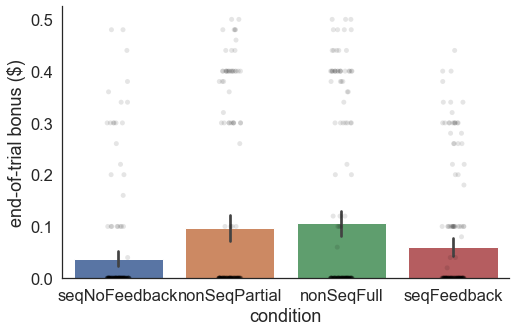

In [3]:
f, ax = plt.subplots(figsize=(8, 5))
sns.barplot(data=df, x='block_type', y='bonus')
sns.stripplot(data=df, x='block_type', y='bonus', color='black', alpha=0.1)
ax.set(ylabel='end-of-trial bonus ($)', xlabel='condition')
sns.despine()


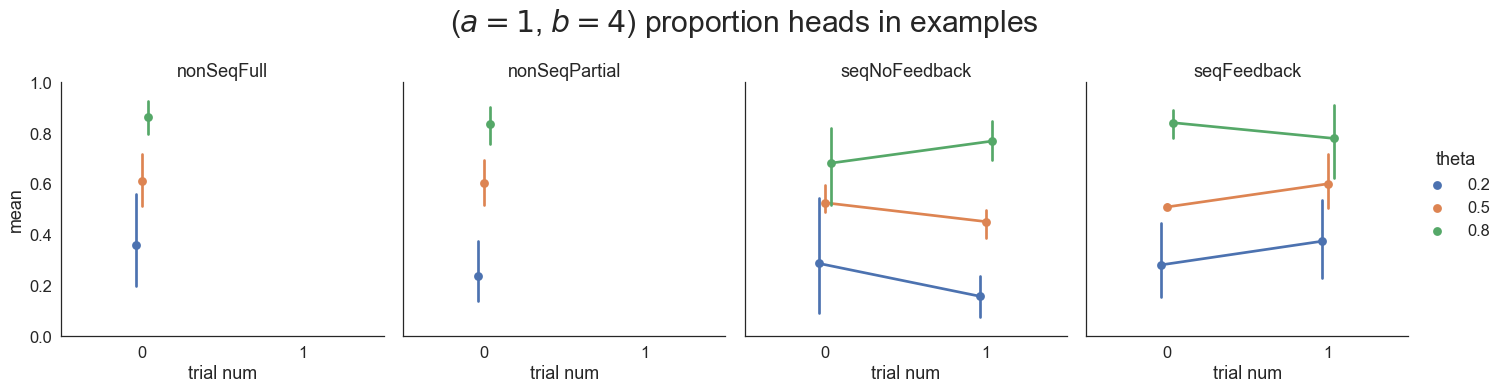

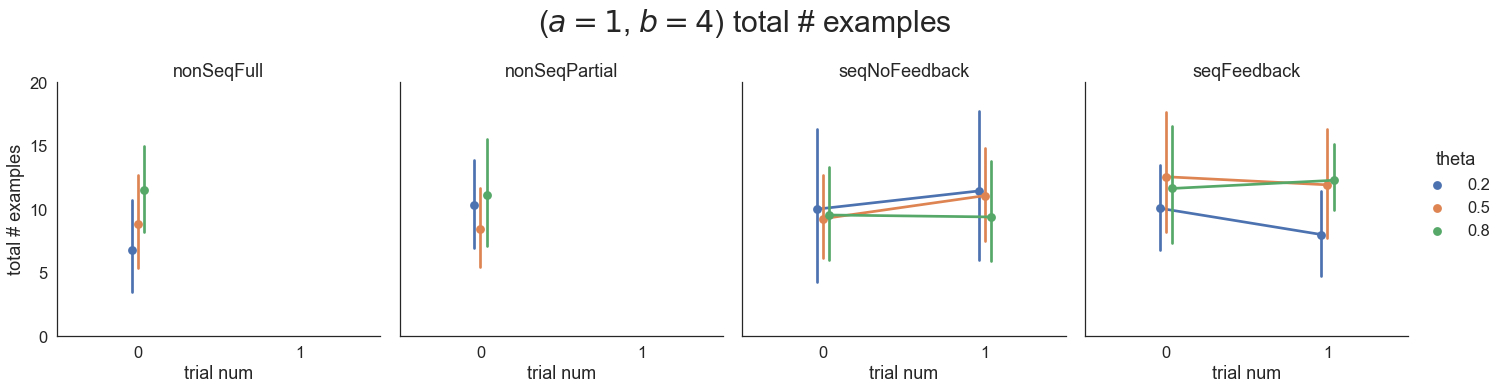

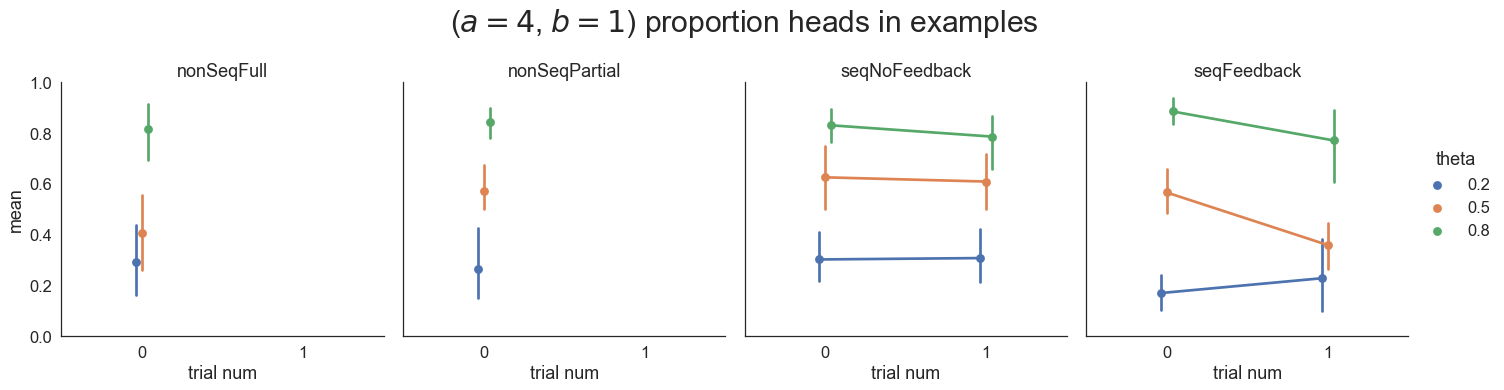

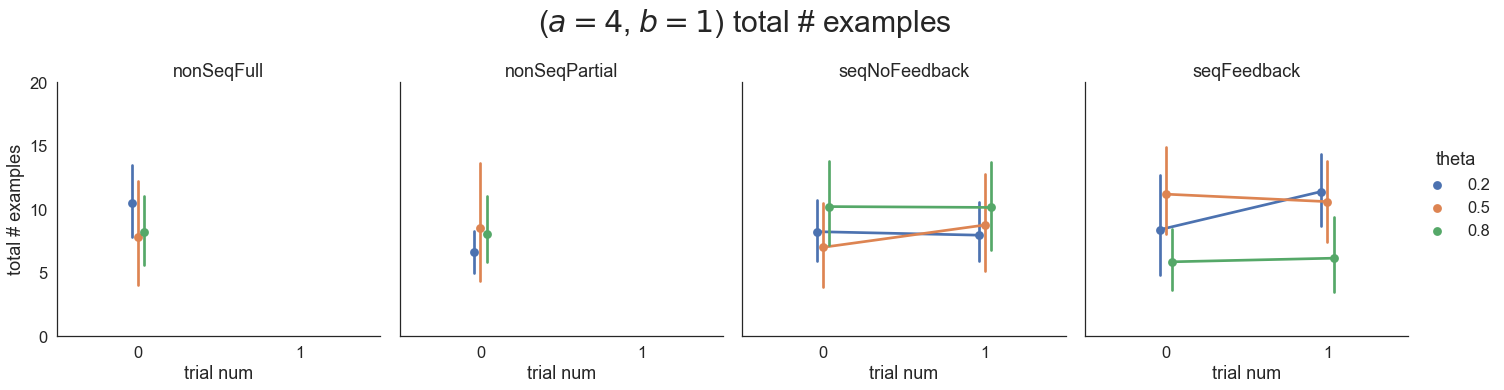

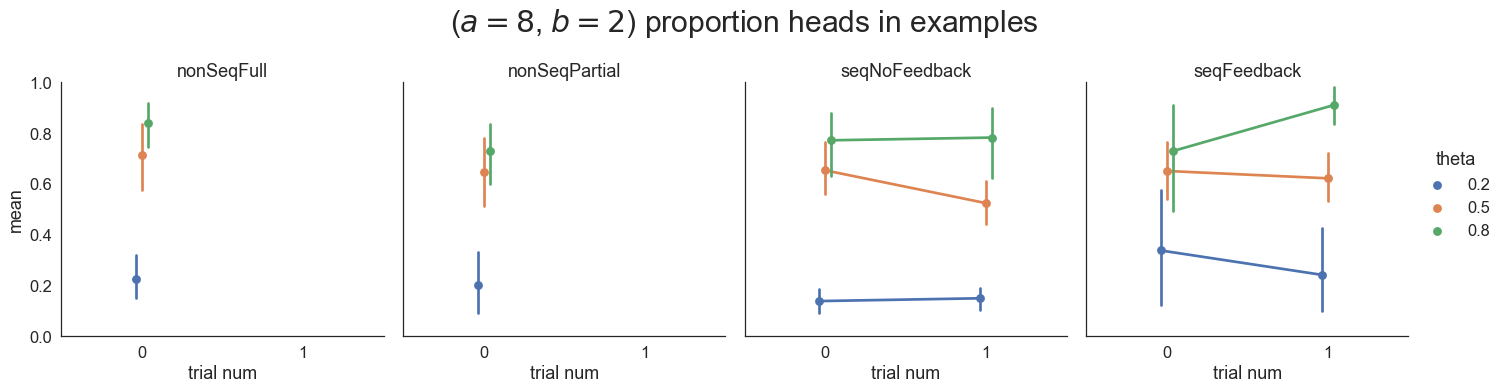

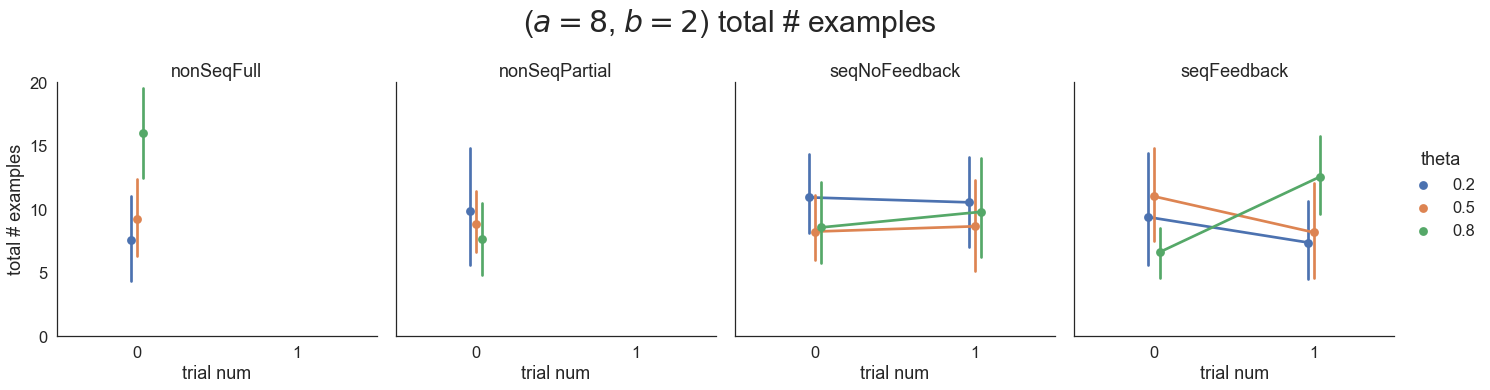

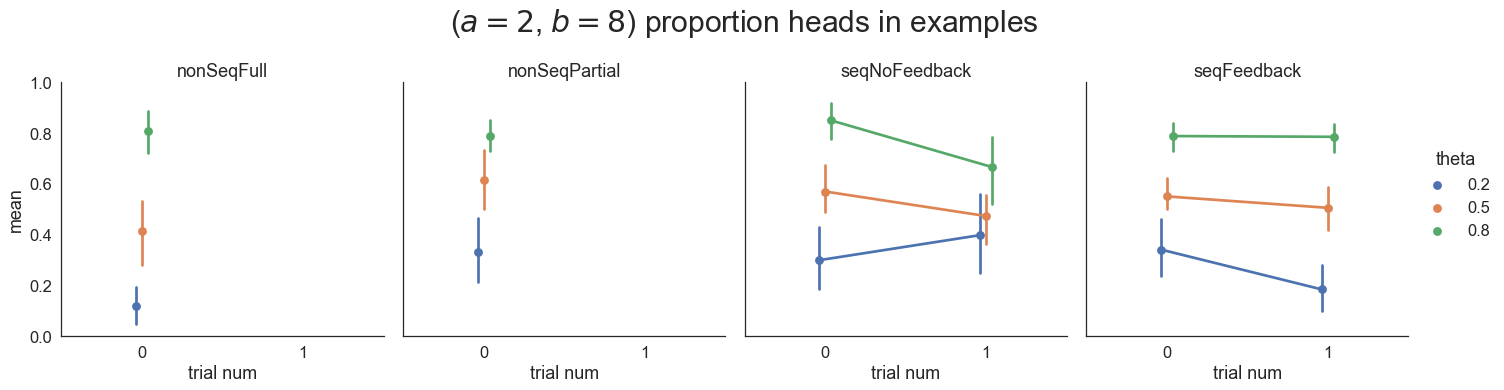

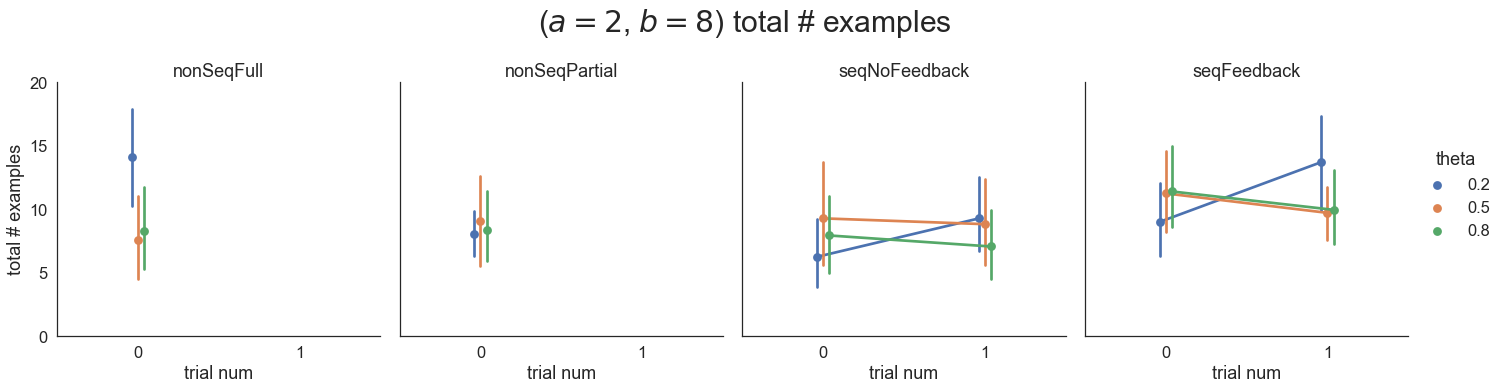

In [4]:
class_hypers = {
    'A': "($a=1$, $b=4$)",
    'B': "($a=4$, $b=1$)",
    'C': "($a=8$, $b=2$)",
    'D': "($a=2$, $b=8$)"
}

for class_id, hypers in class_hypers.items():
    g = sns.catplot(data=df[(df['student_class'] == class_id)], x='trial_num',
                    y='mean', hue='theta', col='block_type', kind='point', dodge=True,
                    col_order=['nonSeqFull', 'nonSeqPartial', 'seqNoFeedback', 'seqFeedback'])
    (g.set_axis_labels("trial num")
     .set_titles("{col_name}")
     .set(ylim=(0, 1))
     .figure.suptitle(hypers + " proportion heads in examples", y=1.1, size=30)
     )

    g = sns.catplot(data=df[(df['student_class'] == class_id)], x='trial_num',
                    y='total_ex', hue='theta', col='block_type', kind='point', dodge=True,
                    col_order=['nonSeqFull', 'nonSeqPartial', 'seqNoFeedback', 'seqFeedback'])
    (g.set_axis_labels("trial num", "total # examples")
    .set(ylim=(0, 20))
     .set_titles("{col_name}")
     .figure.suptitle(hypers + " total # examples", y=1.1, size=30)
     )


Look at the actual points

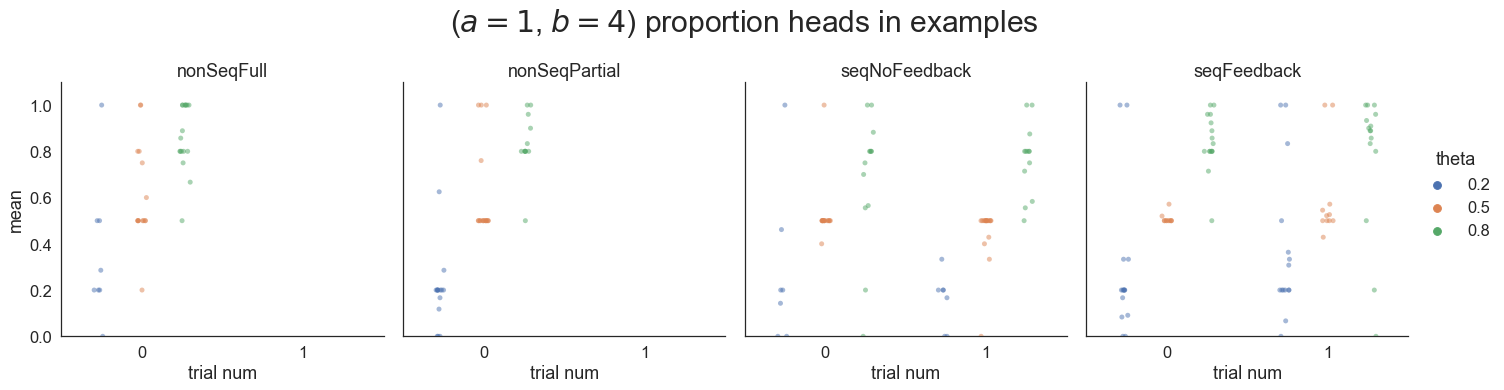

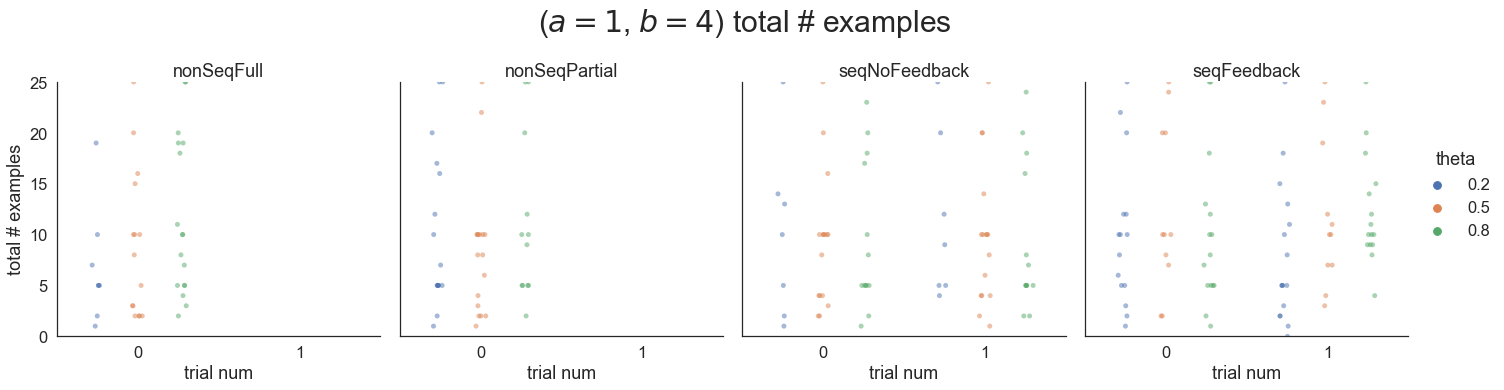

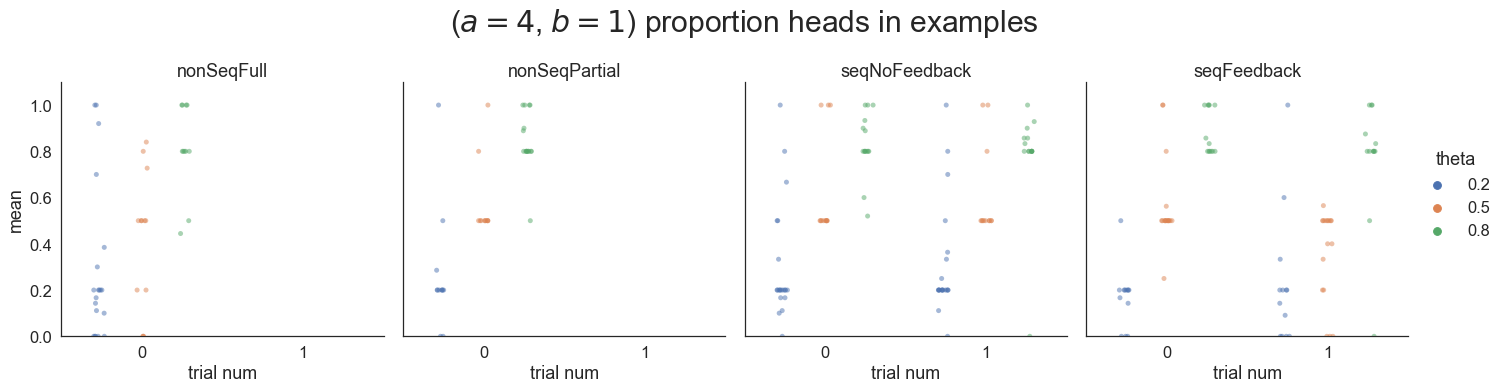

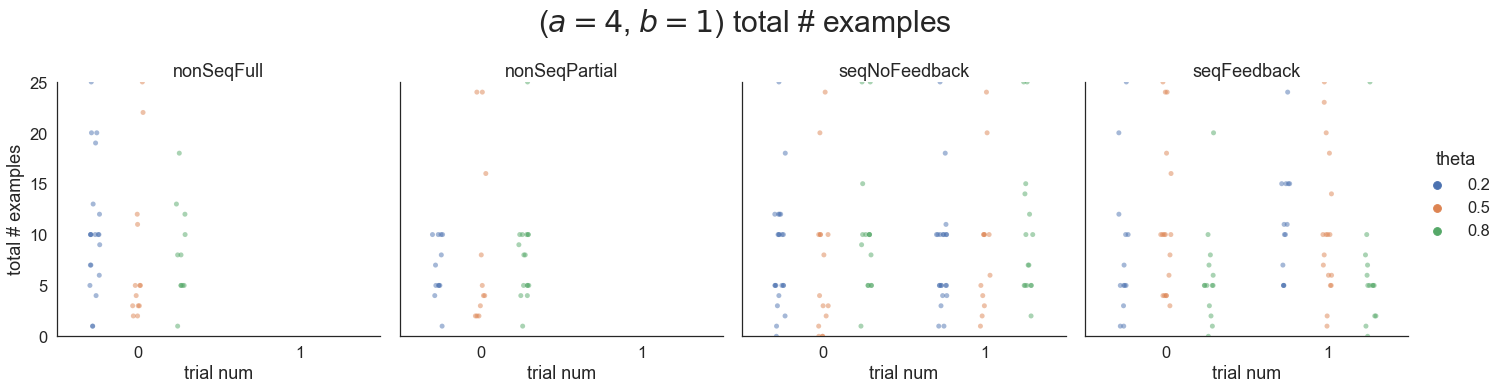

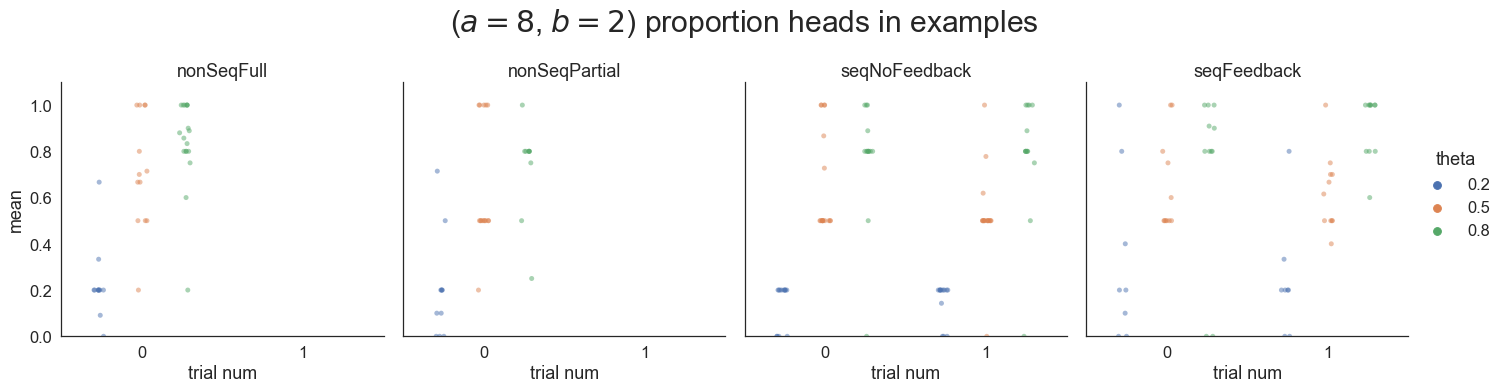

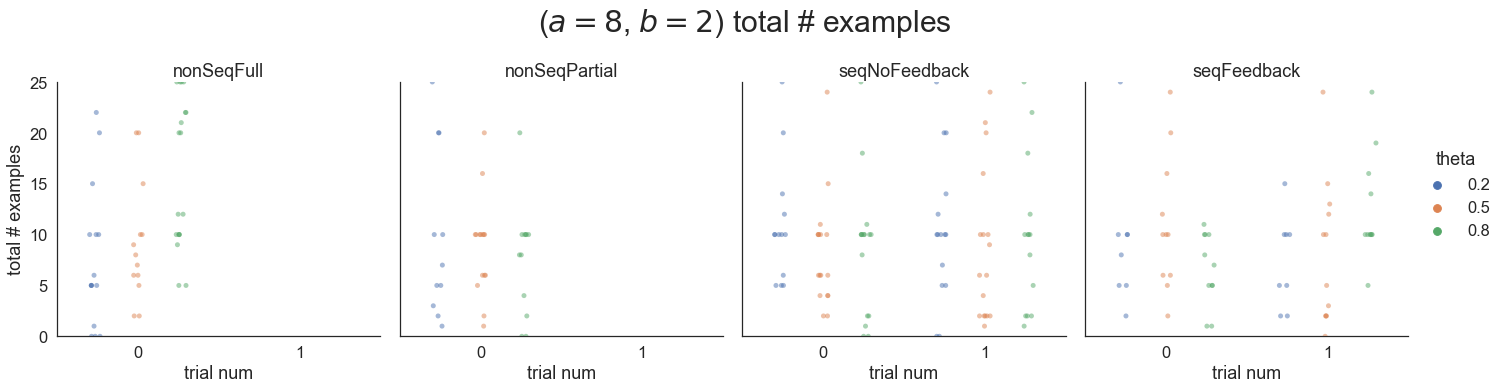

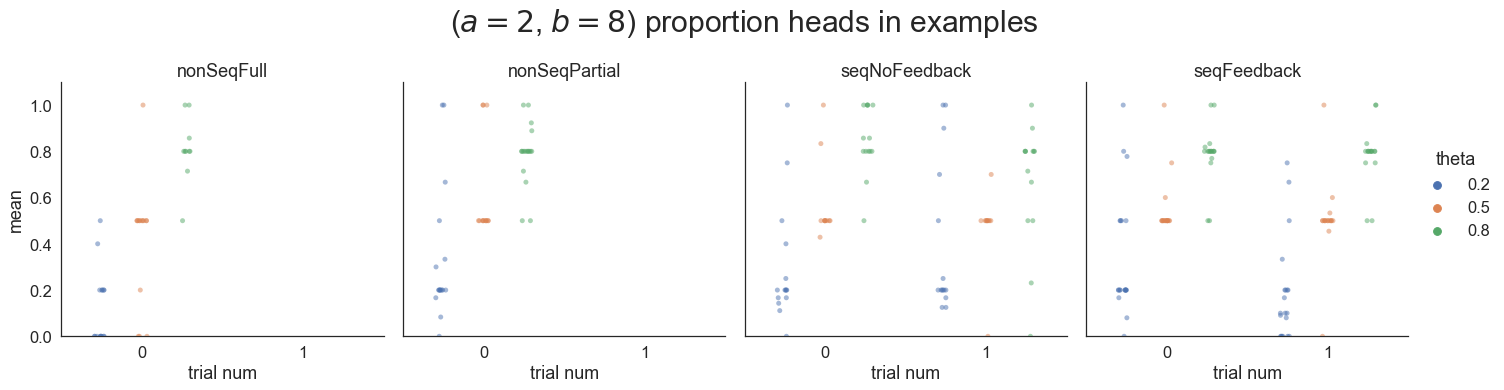

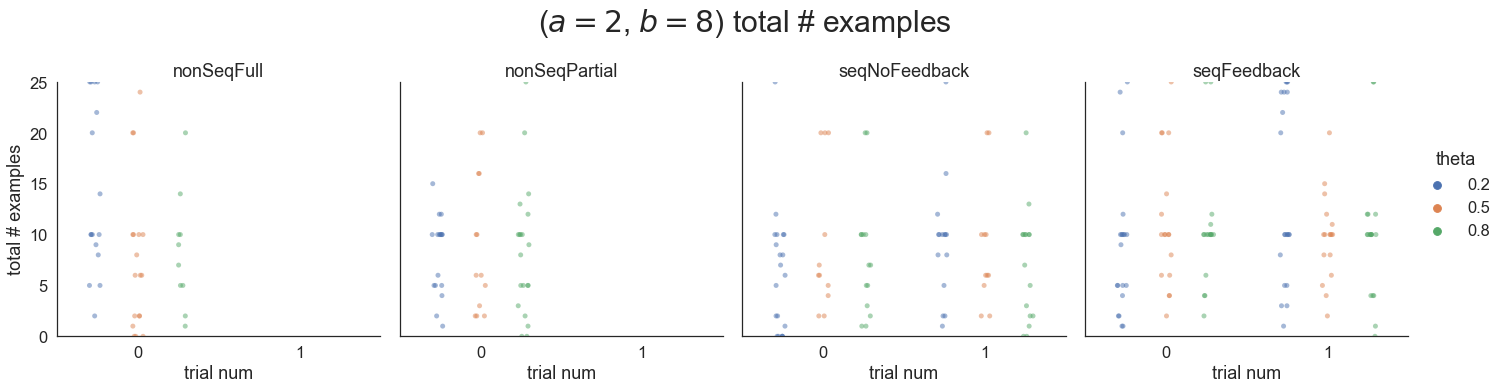

In [5]:
class_hypers = {
    'A': "($a=1$, $b=4$)",
    'B': "($a=4$, $b=1$)",
    'C': "($a=8$, $b=2$)",
    'D': "($a=2$, $b=8$)"
}

for class_id, hypers in class_hypers.items():
    g = sns.catplot(data=df[(df['student_class'] == class_id)], x='trial_num',
                    y='mean', hue='theta', col='block_type', dodge=True,
                    col_order=['nonSeqFull', 'nonSeqPartial', 'seqNoFeedback', 'seqFeedback'], alpha=0.5)
    (g.set_axis_labels("trial num")
     .set_titles("{col_name}")
     .set(ylim=(0, 1.1))
     .figure.suptitle(hypers + " proportion heads in examples", y=1.1, size=30)
     )

    g = sns.catplot(data=df[(df['student_class'] == class_id)], x='trial_num',
                    y='total_ex', hue='theta', col='block_type', dodge=True,
                    col_order=['nonSeqFull', 'nonSeqPartial', 'seqNoFeedback', 'seqFeedback'], alpha=0.5)
    (g.set_axis_labels("trial num", "total # examples")
    .set(ylim=(0, 25))
     .set_titles("{col_name}")
     .figure.suptitle(hypers + " total # examples", y=1.1, size=30)
     )
